Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

Read dataset

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

Display head

In [ ]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Display shape

In [ ]:
df.shape

(200, 5)

Standardizing the variables

In [ ]:
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_fea = pd.DataFrame(features, columns = col_names)

In [ ]:
scaled_fea.head(10)

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980
5,-1.662660,-1.209269,1.001596
6,-1.624491,-0.276302,-1.715913
7,-1.624491,-1.137502,1.700384
8,-1.586321,1.804932,-1.832378
9,-1.586321,-0.635135,0.846310


Hot Encoding gender

In [ ]:
gender = df['Gender']

newdf = scaled_fea.join(gender)
newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
newdf = newdf.drop(['Gender_Male'], axis=1)

In [ ]:
newdf.head(10)

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1
5,-1.662660,-1.209269,1.001596,1
6,-1.624491,-0.276302,-1.715913,1
7,-1.624491,-1.137502,1.700384,1
8,-1.586321,1.804932,-1.832378,0
9,-1.586321,-0.635135,0.846310,1


Clustering model

Text(0, 0.5, 'Inertia')

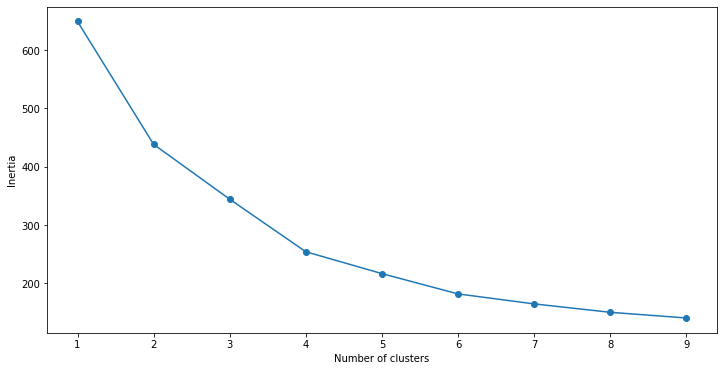

In [ ]:
SSE = []

for cluster in range(1, 10):
  kmeans = KMeans(n_clusters = cluster, init='k-means++')
  kmeans.fit(newdf)
  SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Silhouette coefficient

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(newdf)

KMeans(n_clusters=4)

In [ ]:
print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

0.35027020434653977


Visulaizing clusters

In [ ]:
clusters = kmeans.fit_predict(df.iloc[:,1:])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], df["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)

ax.scatter(newdf.Age[df.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[df.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], df["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

ValueError: ignored

In [ ]:
df.head(100)

In [ ]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [ ]:
ks = range(1, 10)
the_intertias = []

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(PCA_components.iloc[:,:2])
  the_intertias.append(model.inertia_)

plt.plot(ks, the_intertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

In [ ]:
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean'))

In [ ]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)

ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head(100)

In [ ]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df.head()

In [ ]:
sns.barplot(x='cluster',y='Age',data=avg_df)

In [ ]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

In [ ]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

In [ ]:
df2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df2.head(10)